In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from cleaning_tiktok import *
from cleaning_youtube import *
import matplotlib.pyplot as plt
from cleaning_instagram import *


In [89]:
instagram_raw = pd.read_csv("instagram-sep-2022.csv")
tiktok_raw = pd.read_csv("tiktok-sep-2022.csv")
youtube_raw = pd.read_csv("youtube-sep-2022.csv")

In [92]:
instagram_raw[instagram_raw["Audience country"] == "Iran"]

,S.no,Instagram name,Name,Subscribers,Audience country,Authentic engagement,Engagement average,Category_1,Category_2
203,204,serna_amini,Serna Amini,9.6M,Iran,1.4M,1.8M,NaN,NaN
298,299,alidaei,Ali Daei,9.1M,Iran,722.8K,1.2M,Sports with a ball,NaN
334,335,hassan_reyvandi,hasan reyvandi حسن ریوندی,19.7M,Iran,337.9K,466.9K,Cinema & Actors/actresses,Humor & Fun & Happiness
370,371,eminem,Marshall Mathers,36.5M,Iran,171.4K,221.2K,Cinema & Actors/actresses,NaN
481,482,aliiiiiiiikarimi8,Ali Karimi,9.8M,Iran,415.5K,630.7K,Sports with a ball,NaN
483,484,navidmohammadzadeh,navid mohammadzadeh,8.6M,Iran,495.9K,700.1K,Cinema & Actors/actresses,NaN
519,520,golfarahani,Golshifteh Farahani,13.7M,Iran,301.7K,388.9K,Cinema & Actors/actresses,NaN
576,577,donya,Donya,15.3M,Iran,194.2K,308.6K,Lifestyle,NaN
587,588,jeonghaniyoo_n,윤정한,3.6M,Iran,935.4K,1.2M,Lifestyle,NaN
633,634,perspolis,Persepolis,8.3M,Iran,335.2K,476.4K,Sports with a ball,NaN


# Preprocessing

## Instagram

In [48]:
instagram = instagram_raw.pipe(
    drop_useless_cols_instagram
).pipe(
    rename_instagram
).pipe(
    converting_instagram
).pipe(
    sort_values_instagram
)

## YouTube

In [49]:
youtube = youtube_raw.pipe(
    drop_useless_cols_youtube
).pipe(
    rename_youtube
).pipe(
    converting_youtube
).pipe(
    sort_values_youtube
)

## TikTok

In [50]:
tiktok = tiktok_raw.pipe(
    drop_useless_cols_tiktok
).pipe(
    rename_tiktok
).pipe(
    converting_tiktok
).pipe(
    sort_values_youtube
)

## Select Minimum Available Rows

In [51]:
print(f"TikTok Rows: {tiktok.shape[0]}")
print(f"YouTube Rows: {youtube.shape[0]}")
print(f"Instagram Rows: {instagram.shape[0]}")

TikTok Rows: 1000
YouTube Rows: 1047
Instagram Rows: 1050


**1000 Rows Selected‌ **

In [52]:
instagram = instagram.loc[:999,:]
youtube = youtube.loc[:999,:]

## Convert All Subscriber Numbers to Milion

In [93]:
tiktok["subscribers"] = tiktok["subscribers"] / 1000000
youtube["subscribers"] = youtube["subscribers"] / 1000000
instagram["subscribers"] = instagram["subscribers"] / 1000000

# Analogy

## Histograms

<AxesSubplot:>

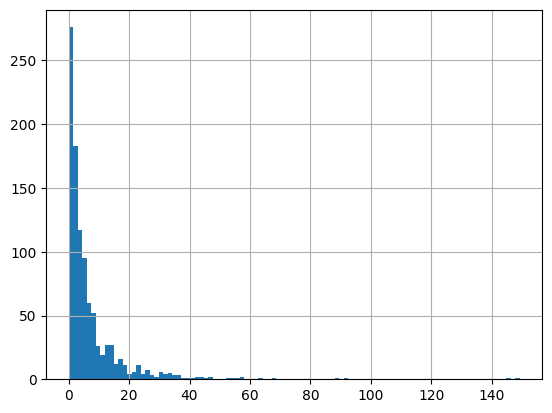

In [94]:
tiktok.subscribers.hist(bins = 100)

<AxesSubplot:>

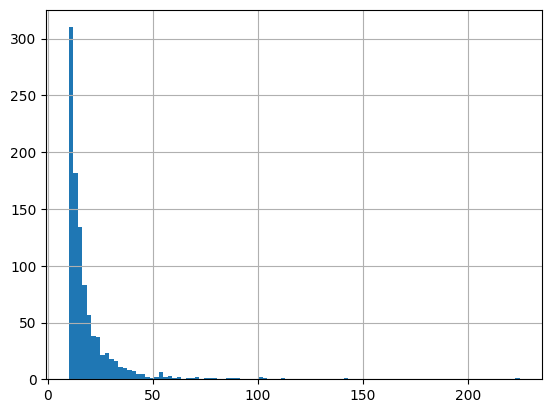

In [97]:
youtube.subscribers.hist(bins = 100)

<AxesSubplot:>

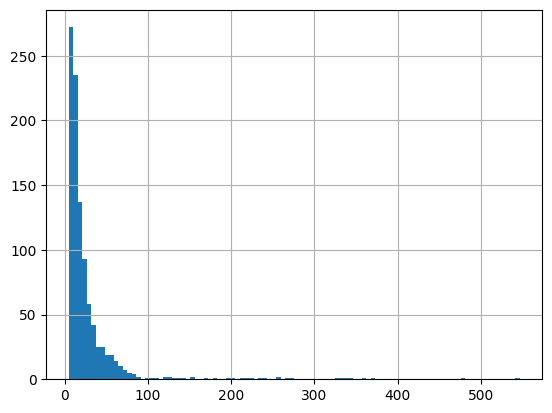

In [98]:
instagram.subscribers.hist(bins = 100)

**All histograms are right-skewed**

In [99]:
# To Save Info for Analogy
info = {}

## Median

In [101]:
print(f"TikTok Subscribers Median: {tiktok.subscribers.median()} M")
print(f"YouTube Subscribers Median: {youtube.subscribers.median()} M")
print(f"Instagram Subscribers Median: {instagram.subscribers.median()} M")


TikTok Subscribers Median: 3.5 M
YouTube Subscribers Median: 14.4 M
Instagram Subscribers Median: 15.1 M


## Mean

In [104]:
print(f"TikTok Subscribers Mean: {tiktok.subscribers.mean()} M")
print(f"YouTube Subscribers Mean: {youtube.subscribers.mean()} M")
print(f"Instagram Subscribers Mean: {instagram.subscribers.mean()} M")

TikTok Subscribers Mean: 7.083611284 M
YouTube Subscribers Mean: 18.762999991 M
Instagram Subscribers Mean: 27.292399987999996 M


**Above cell shows if you want to be popular more than 50% of Top-1000 acounts in each platfrom, how many subscribers should you have.**

**Above cell also shows that the mean of Instagram extremly affect by outliers in our samples. The median is better metric here for a fair analogy.**




## Standard Deviation

In [103]:
# Delta Degrees of Freedom (ddof) is equal to 1, coz we have sample, not population
print(f"TikTok Subscribers Standard Deviation: {tiktok.subscribers.std(ddof = 1)} M")
print(f"YouTube Subscribers Standard Deviation: {youtube.subscribers.std(ddof = 1)} M")
print(f"Instagram Subscribers Standard Deviation: {instagram.subscribers.std(ddof = 1)} M")

TikTok Subscribers Standard Deviation: 11.606181821200133 M
YouTube Subscribers Standard Deviation: 14.271720743867045 M
Instagram Subscribers Standard Deviation: 44.88499888426487 M


---



**What if you want to be popular more than 84% of Top-1000 acounts in each platfrom?**

**Then how many subscribers should you have?**

In [111]:
print(f"TikTok Subscribers (Mean+Std): {tiktok.subscribers.mean() + tiktok.subscribers.std(ddof = 1)} M")
print(f"YouTube Subscribers (Mean+Std): {youtube.subscribers.mean() + youtube.subscribers.std(ddof = 1)} M")
print(f"Instagram Subscribers (Mean+Std): {instagram.subscribers.mean() + instagram.subscribers.std(ddof = 1)} M")

TikTok Subscribers (Mean+Std): 18.68979310520013 M
YouTube Subscribers (Mean+Std): 33.034720734867044 M
Instagram Subscribers (Mean+Std): 72.17739887226486 M
